# Differentiated Thyroid Cancer Recurrence 🩺⚕️💊

## Thyroid Differential Diagnosis Classifier: This repository contains machine learning models for the classificatio, this data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years..

In [291]:
# 📚 Importing the Basic Libraries 📊

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import loguniform

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

# from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [292]:
!pip install statsmodels imblearn xgboost

In [293]:
df = pd.read_csv(r"C:\Users\user\Project Thyroid\Thyroid_Diff.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [294]:
original_df = df.copy(deep=True)

<Axes: >

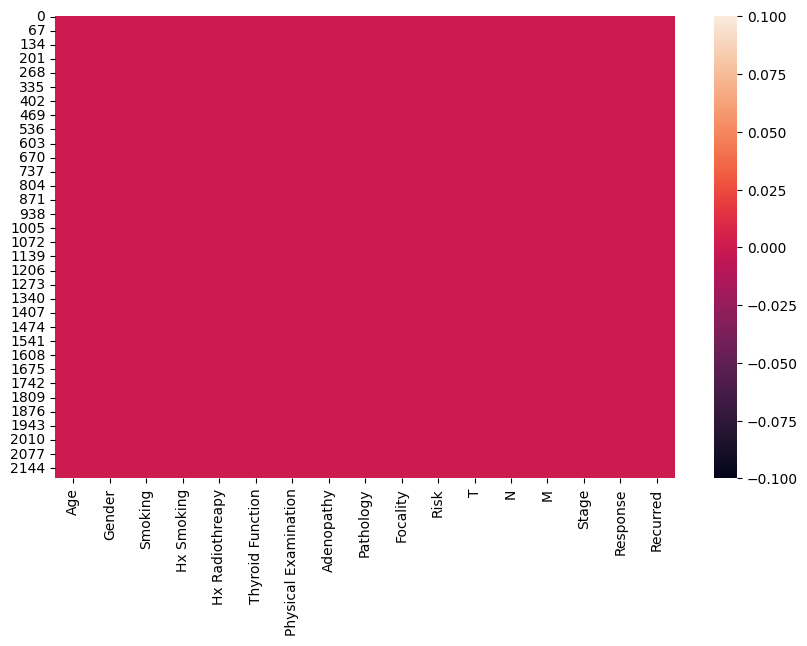

In [295]:
sns.heatmap(df.isnull())

### Calculate Percentage of Missing Values in Each Feature 📉📊

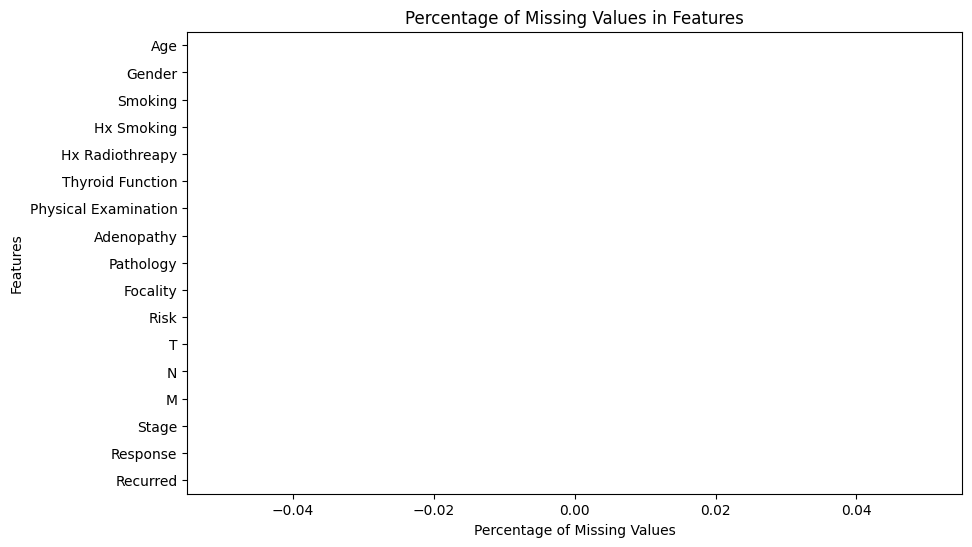

In [296]:
missing_percentage = (df.isnull().mean() * 100).round(2)

# 📊 Plotting 📈

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette="viridis")
plt.title('Percentage of Missing Values in Features')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.show()

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   2193 non-null   int64 
 1   Gender                2193 non-null   object
 2   Smoking               2193 non-null   object
 3   Hx Smoking            2193 non-null   object
 4   Hx Radiothreapy       2193 non-null   object
 5   Thyroid Function      2193 non-null   object
 6   Physical Examination  2193 non-null   object
 7   Adenopathy            2193 non-null   object
 8   Pathology             2193 non-null   object
 9   Focality              2193 non-null   object
 10  Risk                  2193 non-null   object
 11  T                     2193 non-null   object
 12  N                     2193 non-null   object
 13  M                     2193 non-null   object
 14  Stage                 2193 non-null   object
 15  Response              2193 non-null   

In [298]:
## df.drop(['PassengerId','Cabin'],axis=1, inplace=True)

target = 'Recurred'
features = [i for i in df.columns.values if i not in [target]]

print(df.shape)

(2193, 17)


In [299]:
df.nunique().sort_values()

Recurred                 2
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
M                        2
Focality                 2
N                        3
Risk                     3
Pathology                4
Response                 4
Physical Examination     5
Thyroid Function         5
Stage                    5
Adenopathy               6
T                        7
Age                     65
dtype: int64

In [300]:
# Categorizing DataFrame Features 📊🔢

cat_feature = []
num_feature = []
for feature in df.columns:
    if feature != 'Survived':
        if df[feature].nunique() <= 15:
            cat_feature.append(feature)
        else:
            num_feature.append(feature)
        
print(cat_feature, num_feature)

['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'] ['Age']


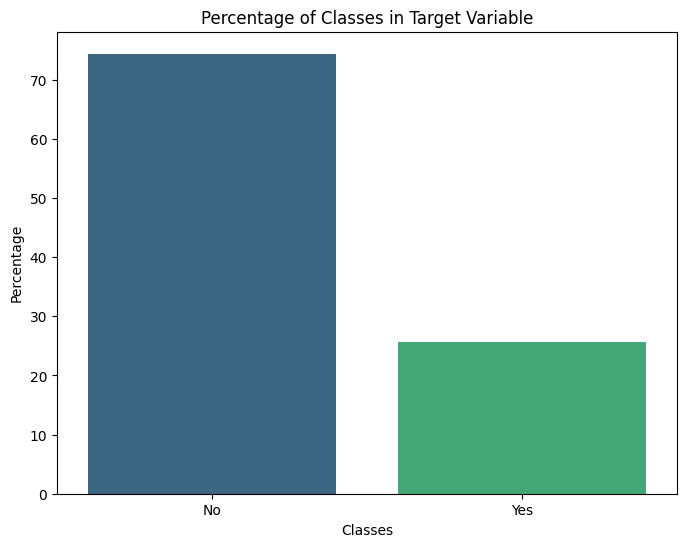

In [301]:
# Target Variable Class Percentage 📊🎯

class_percentage = (df['Recurred'].value_counts(normalize=True) * 100).round(2)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=class_percentage.index, y=class_percentage.values, palette="viridis")
plt.title('Percentage of Classes in Target Variable')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

### 📊🔍 Plotting Features 🔍📊

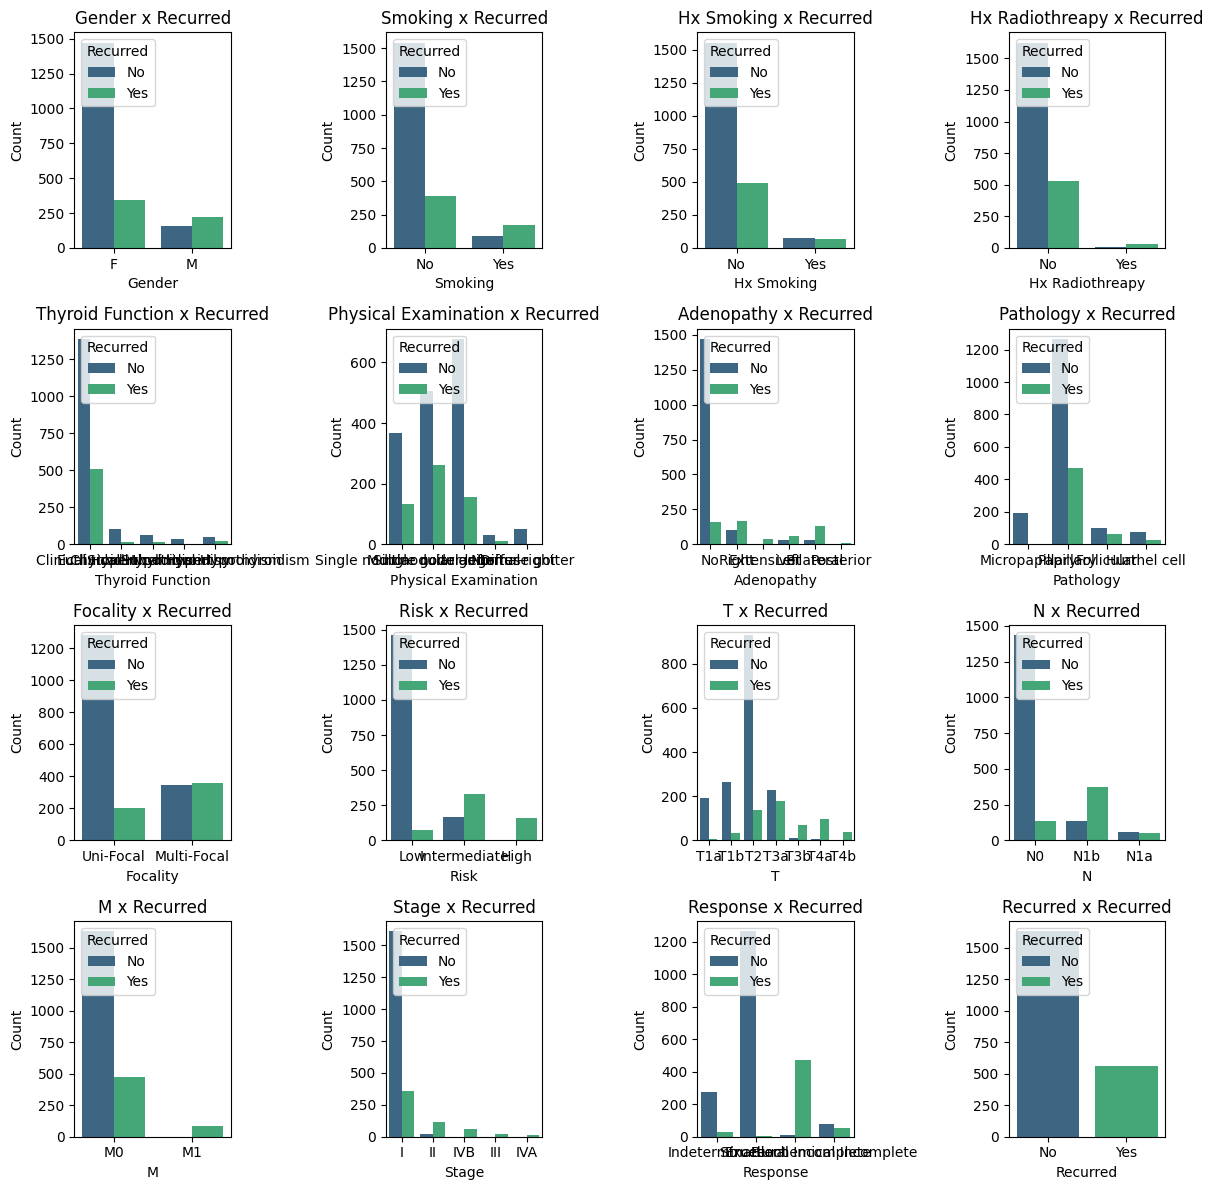

In [302]:
# Plotting features

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cat_feature is a list of categorical feature names in your DataFrame df

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Create a 4x4 grid of subplots

# Enumerate over cat_feature for efficient plotting and labeling
for i, feature in enumerate(cat_feature):
    row, col = divmod(i, 4)  # Calculate row and column indices for each subplot

    sns.countplot(ax=axes[row, col], data=df, x=feature, hue='Recurred', palette='viridis')
    axes[row, col].set_title(f'{feature} x Recurred')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Recurred', labels=['No', 'Yes'], loc='upper left')

# Adjust layout (optional, but recommended for aesthetics)
plt.tight_layout()

plt.show()

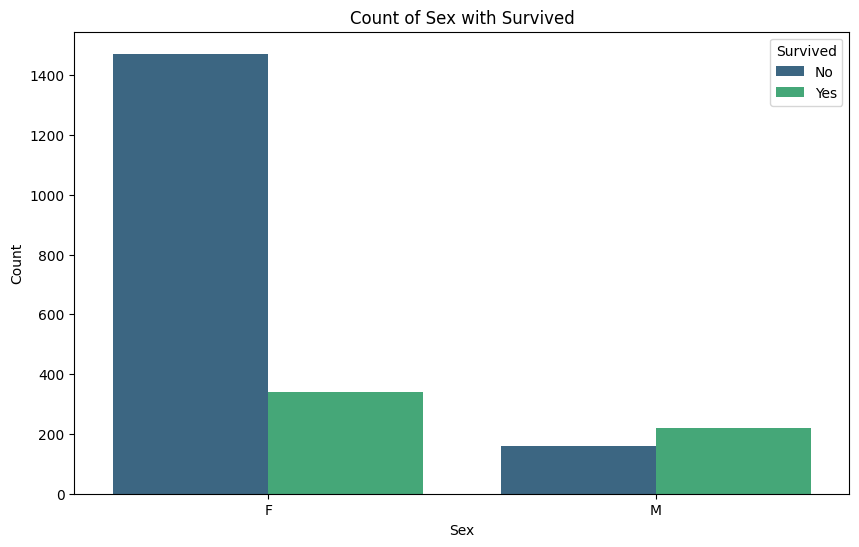

In [303]:
sns.countplot(data=df, x='Gender', hue='Recurred', palette='viridis')
plt.title('Count of Sex with Survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

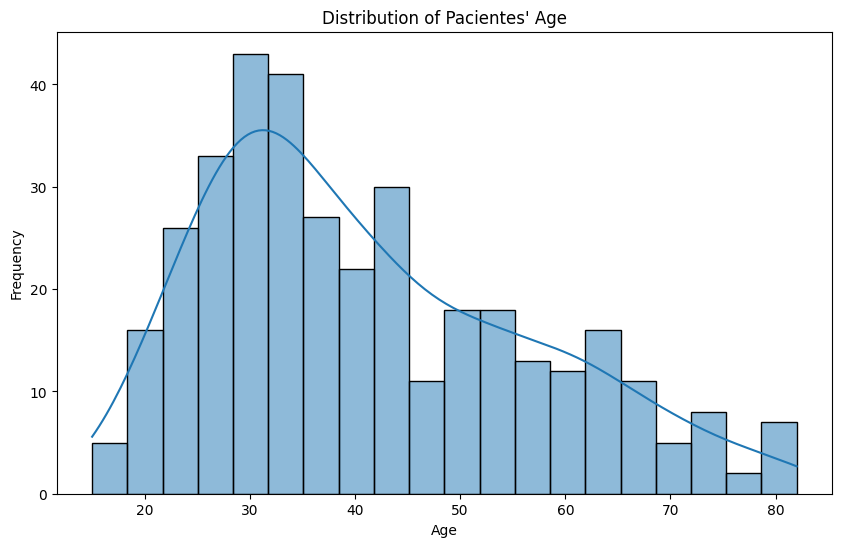

In [323]:
# Patient Age Distribution 📊👥

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Pacientes\' Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [305]:
df = df.drop_duplicates()
print(f"Duplicates dropped: {original_df.shape[0] - df.shape[0]}")

Duplicates dropped: 1829


In [306]:
# Outlier Detection: IQR Method 📊🔍

outliers_iqr = []
for feature in num_feature:
    print(feature)
    q1 = df[feature].quantile(0.20)
    q3 = df[feature].quantile(0.80)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_iqr.extend(df[(df[feature] >= upper_bound) | (df[feature] <= lower_bound)].index)

    # Count unique outliers
    num_outliers_iqr = len(set(outliers_iqr))

    print(f"Number of outliers using IQR method: {num_outliers_iqr}")
    
df_wo_outliers = df.drop(index=outliers_iqr)

Age
Number of outliers using IQR method: 0


In [307]:
df.shape, df_wo_outliers.shape

((364, 17), (364, 17))

In [308]:
# Dummy

df_encoded = df_wo_outliers.copy()
for feature in cat_feature:
    df_encoded = pd.concat([df_encoded.drop([feature], axis=1), pd.DataFrame(pd.get_dummies(df_encoded[feature], drop_first=True, prefix=feature, dtype = int))],axis=1)

In [309]:
df_encoded.head()

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,T_T1b,T_T2,T_T3a,T_T3b,T_T4a,T_T4b,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,27,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,34,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,30,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,62,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,62,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 📊 Handling Imbalanced Dataset: SMOTE 🔄

- **Identify Minority Class:** 🔍

- **Identify Nearest Neighbors:** 📍

- **Generate Synthetic Samples:** 🔄

- **Repet:** 🔁
rity class.


In [310]:
# Fixing the Imbalance using SMOTE Technique 🔄📊🔧

target = 'Recurred_Yes'
print('Original class distribution:')
print(df_encoded[target].value_counts())

cols = df_encoded.columns
X = df_encoded.drop([target],axis=1)
Y = df_encoded[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df_encoded = pd.DataFrame(X, columns=cols)
df_encoded[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
Recurred_Yes
0    256
1    108
Name: count, dtype: int64

Class distribution after applying SMOTE Technique:
Recurred_Yes
0    256
1    256
Name: count, dtype: int64


In [311]:
# Splitting into Features (X) and Target Variable (y) 🔍🎯

X = df_encoded.drop(columns=['Recurred_Yes'])  # Features
y = df_encoded['Recurred_Yes']  # Target variable

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying shapes of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (409, 40)
Shape of X_test: (103, 40)
Shape of y_train: (409,)
Shape of y_test: (103,)


In [312]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying shapes of the scaled datasets
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (409, 40)
Shape of X_test_scaled: (103, 40)


## ✨🚀 Modeling  🌌✨

In [313]:
#Classification Summary Function ⚙️
def Classification_Summary(pred,pred_prob,i):
    
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))
    plt.show()

In [314]:
# 🛠️📊👷 Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(X_train_scaled, y_train).best_estimator_
pred = LR.predict(X_test_scaled)
pred_prob = LR.predict_proba(X_test_scaled)
Classification_Summary(pred,pred_prob,0)

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)

Accuracy = 95.1%
F1 Score = 95.1%

 Confusiton Matrix:
 [[52  2]
 [ 3 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.96      0.94      0.95        49

    accuracy                           0.95       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.95      0.95      0.95       103

intercept  0.5532102477751691
classes [0 1]


In [315]:
# 🌲🌲🌲 Building Random-Forest Classifier 🌲🌲🌲

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(X_train_scaled, y_train).best_estimator_
pred = RF.predict(X_test_scaled)
pred_prob = RF.predict_proba(X_test_scaled)
Classification_Summary(pred,pred_prob,2)

Accuracy = 97.1%
F1 Score = 97.1%

 Confusiton Matrix:
 [[54  0]
 [ 3 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.94      0.97        49

    accuracy                           0.97       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



In [316]:
🏁 # Initialize XGBoost classifier
model = XGBClassifier()

🏋️‍♂️ # Train the model
model.fit(X_train_scaled, y_train)

🔍 # Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.970873786407767


In [317]:
🏋️‍♂️ # Train the SVC model
model = SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train_scaled, y_train)

🔍 # Calculate model accuracy
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

🎯 # Make predictions
pred = model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, pred))

# Use this code to print Confusion Matrix

""" Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show() """

Accuracy: 0.9320388349514563
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.94      0.92      0.93        49

    accuracy                           0.93       103
   macro avg       0.93      0.93      0.93       103
weighted avg       0.93      0.93      0.93       103



" Calculate confusion matrix\nconf_matrix = confusion_matrix(y_test, pred)\n\n# Visualize confusion matrix\nplt.figure(figsize=(4, 4))\nsns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)\nplt.xlabel('Predicted labels')\nplt.ylabel('True labels')\nplt.title('Confusion Matrix')\nplt.show() "

## 🏋🏋️‍♂️Evaluating Classification Model Performance 🏋️‍♂️🏋
### The objective of this code is to train multiple classification models (such as Logistic Regression, SVM, Random Forest, and XGBoost), evaluate their performance using metrics like accuracy, precision, recall, F1 score, and ROC AUC, and present the results in a tabular form using a pandas DataFrame.

In [318]:
def Classification_Summary(y_test, pred, pred_prob):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_prob[:, 1])

    return accuracy, precision, recall, f1, roc_auc

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear', probability=True, random_state=0),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Create empty lists to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Iterate over models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    # Predictions
    pred = model.predict(X_test_scaled)
    pred_prob = model.predict_proba(X_test_scaled)
    # Get metrics
    accuracy, precision, recall, f1, roc_auc = Classification_Summary(y_test, pred, pred_prob)
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    metrics['ROC AUC'].append(roc_auc)

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the table
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.951456   0.958333  0.938776  0.948454  0.973923
1                  SVM  0.932039   0.937500  0.918367  0.927835  0.953137
2        Random Forest  0.980583   1.000000  0.959184  0.979167  0.998488
3              XGBoost  0.970874   1.000000  0.938776  0.968421  0.995465


### 🌟🔥 Plotting Confusion Matrix 🌪️🔮

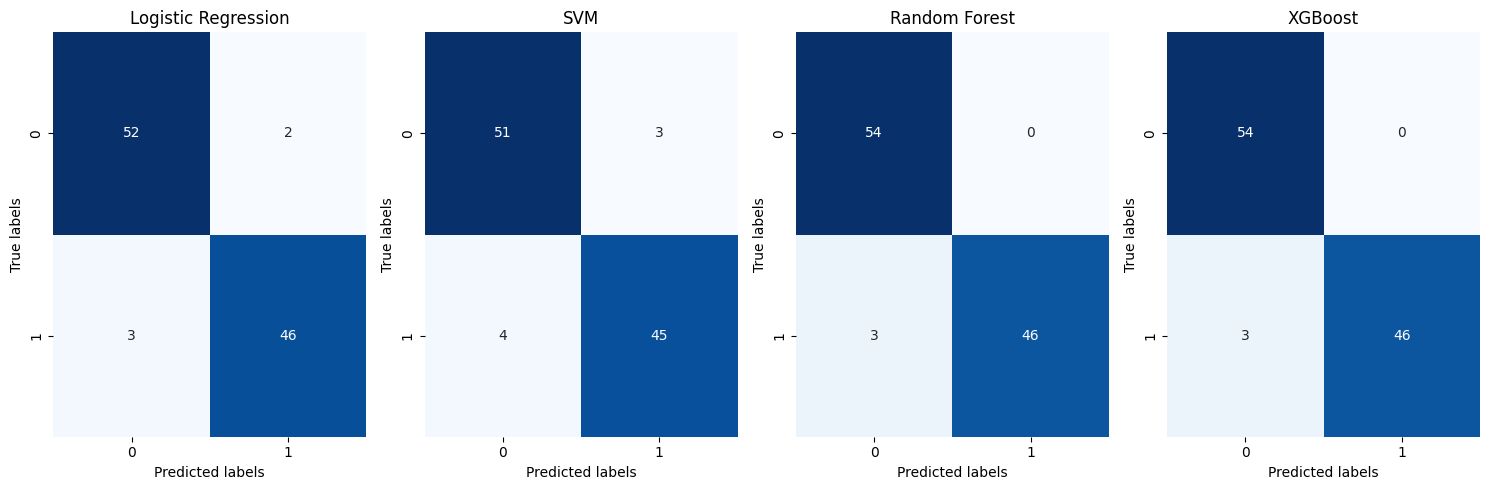

In [319]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear', probability=True, random_state=0),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

# Iterate over models
for ax, (model_name, model) in zip(axes, models.items()):
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Predictions
    pred = model.predict(X_test_scaled)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()
plt.show()

## 🏆🎖️⭐ Conclusion: Model Performance Summary ⭐🎖️🏆
🎯 
Upon conclusion of the exercise, it can be determined that, based on performance metrics (Accuracy, Precision, Recall, F1 Score, and ROC AUC) obtained from different classification models (Logistic Regression, SVM, Random Forest, and XGBoost) trained on the dataset, the Random Forest model emerged as the champion, achieving an impressive accuracy of 98.06% and a ROC AUC of 99.85%. Meanwhile, the SVM model lagged behind with the lowest accuracy of 93.20%.

📝 Additionally, it's noteworthy that this model's predictions could be implemented by linking them with a patient's medical history to showcase the probability of recurrence in a patient, utilizing the data available in such datasets. This integration could provide valuable insights to healthcare professionals for early intervention and personalized treatment strategies.
